# Radioactive Decay Simulation: Coupled vs. Successive Systems

## 1. Problem Overview
This notebook explores two different types of radioactive decay dynamics using numerical methods (Euler's Method).

### (a) Reversible (Coupled) Decay: $A \rightleftharpoons B$
In this system, species A decays into B, and species B decays back into A. This creates a feedback loop.

### (b) Successive (Chain) Decay: $A \rightarrow B \rightarrow C$
In this system, A decays into B, and B decays into a separate species (effectively leaving the system).

## 2. Mathematical Framework & Methodology

### The Ordinary Differential Equations (ODEs)
For **Situation (a)** (Coupled Decay), the rate of change for each population is:
$$\frac{dN_A}{dt} = -\frac{N_A}{\tau_A} + \frac{N_B}{\tau_B}$$
$$\frac{dN_B}{dt} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}$$

For **Situation (b)** (Successive Decay), assuming a common $\tau = 1$:
$$\frac{dN_A}{dt} = -\frac{N_A}{\tau}$$
$$\frac{dN_B}{dt} = \frac{N_A}{\tau} - \frac{N_B}{\tau}$$

### Euler’s Method
We will solve these using **Euler’s Method**, which approximates the solution by taking small steps in time ($\Delta t$). The population at the next time step is calculated as:
$$N(t + \Delta t) \approx N(t) + \frac{dN}{dt} \cdot \Delta t$$

### The Equilibrium Ratio
In Situation (a), the system stops changing when $\frac{dN_A}{dt} = 0$. 
Setting the first equation to zero:
$$0 = -\frac{N_A}{\tau_A} + \frac{N_B}{\tau_B} \implies \frac{N_A}{N_B} = \frac{\tau_A}{\tau_B}$$
This confirms that the final population ratio is directly determined by the ratio of the time constants.

---

## Situation 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def situation1_coupled_decay(tau_ratio , na_0 = 100 , nb_0 = 0 , dt = 0.01, t_max = 10):

    tau_b = 1.0
    tau_a = tau_ratio * tau_b

    t = np.arange(0,t_max,dt)
    na = np.zeros(len(t))
    nb = np.zeros(len(t))

    na[0] = na_0
    nb[0] = nb_0

    for i in range(len(t) - 1):

        dna_dt = -na[i]/tau_a + nb[i]/tau_b
        dnb_dt = na[i]/tau_a - nb[i]/tau_b

        na[i+1] = na[i] + dna_dt*dt
        nb[i+1] = nb[i] + dnb_dt*dt

    return t , na , nb    

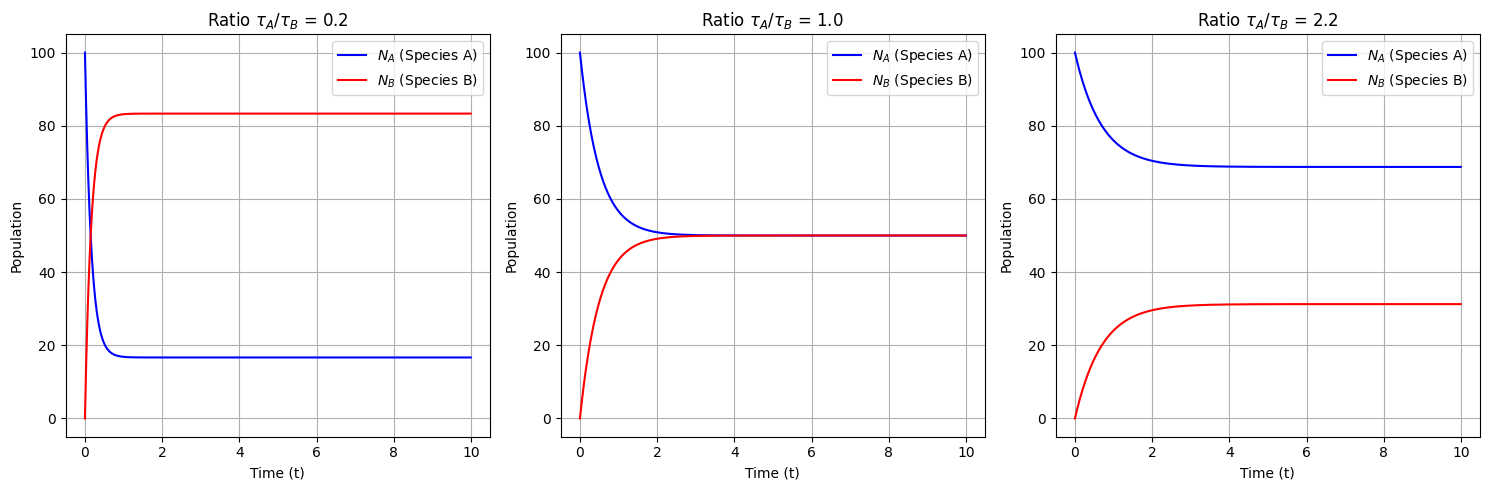

In [3]:
ratios = [0.2, 1.0, 2.2]
plt.figure(figsize=(15, 5))

for i, r in enumerate(ratios):
    t, na, nb = situation1_coupled_decay(r)
    plt.subplot(1, 3, i+1)
    plt.plot(t, na, label='$N_A$ (Species A)', color='blue')
    plt.plot(t, nb, label='$N_B$ (Species B)', color='red')
    plt.title(f'Ratio $\\tau_A/\\tau_B$ = {r}')
    plt.xlabel('Time (t)')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Observations: Situation (a)

Based on the plots generated, we can observe the following:

* **Equilibrium Behavior:** In all three cases, the populations of $N_A$ and $N_B$ do not drop to zero. Instead, they reach a **steady state** where the amount of A turning into B is perfectly balanced by B turning back into A.
* **Effect of the Ratio $\tau_A/\tau_B$:**
    * **Ratio = 0.2 ($\tau_A < \tau_B$):** Species A decays much faster than B. Consequently, the equilibrium favors $N_B$. Species B ends up with the majority of the population ($\approx 83$ vs $\approx 17$).
    * **Ratio = 1.0 ($\tau_A = \tau_B$):** Both species decay at the same rate. They meet exactly in the middle, each holding 50 particles.
    * **Ratio = 2.2 ($\tau_A > \tau_B$):** Species B decays back into A much faster than A decays into B. Therefore, the equilibrium favors $N_A$. Species A retains the majority of the population ($\approx 69$ vs $\approx 31$).
* **Verification:** The numerical results match the analytical prediction $\frac{N_A}{N_B} = \frac{\tau_A}{\tau_B}$. For example, when the ratio is 2.2, $69/31 \approx 2.2$.

## 4. Conclusion: Situation (a)

The behavior of the solution depends on the ratio $\tau_A/\tau_B$ because it represents the relative "strength" of the decay in each direction. 

Since the system is **closed** (particles are only swapped, not lost), the total number of particles $N_{total} = N_A + N_B$ remains constant at 100. The ratio of the time constants determines how that 100 is distributed at equilibrium. The results are exactly as expected from the steady-state solution of the coupled ODEs.

---

## Situation 2

In [4]:
def situation2_decay(tau = 1.0, na_0 = 100 , nb_0 = 0 , dt = 0.01, t_max = 10):

    t = np.arange(0, t_max, dt)
    na = np.zeros(len(t))
    nb = np.zeros(len(t))
    
    na[0] = na_0
    nb[0] = nb_0
    
    for i in range(len(t) - 1):

        dna_dt = -na[i] / tau
        dnb_dt = (na[i] / tau) - (nb[i] / tau)
        
        na[i+1] = na[i] + dna_dt * dt
        nb[i+1] = nb[i] + dnb_dt * dt
        
    return t, na, nb

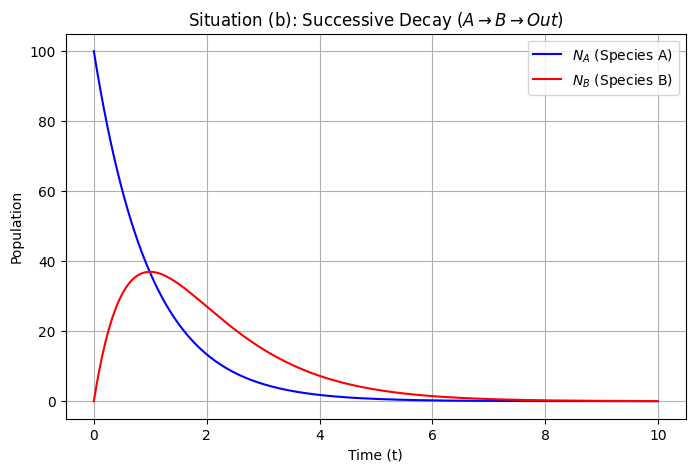

In [5]:
t, na, nb = situation2_decay()

plt.figure(figsize=(8, 5))
plt.plot(t, na, label='$N_A$ (Species A)', color='blue')
plt.plot(t, nb, label='$N_B$ (Species B)', color='red')
plt.title('Situation (b): Successive Decay ($A \\rightarrow B \\rightarrow Out$)')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## 5. Observations: Situation (b)

Looking at the plot for the successive decay ($A \rightarrow B \rightarrow Out$):

* **No Equilibrium:** Unlike Situation (a), both populations eventually drop to zero.
* **$N_A$ Behavior:** $N_A$ follows a standard exponential decay curve. Since nothing converts back into A, it simply depletes until it hits the baseline.
* **$N_B$ Behavior:** Species B shows a "rise and fall" pattern. 
    * Initially, it increases because the rate of production from A is higher than its own decay rate.
    * Once $N_A$ becomes small enough, the decay of B takes over, and $N_B$ returns to zero.
* **Asymptotic Trend:** As $t \to \infty$, both $N_A(t) \to 0$ and $N_B(t) \to 0$.

## Question : Why does the solution in (a) reach a constant non-zero equilibrium eventually and the solution in (b) does not?

## Answers : 

- (a) : Particles are never lost; they are simply recycled. Eventually, the rate of $A \rightarrow B$ matches the rate of $B \rightarrow A$.Because the total number of particles is conserved ($N_A + N_B = 100$), the populations settle into a constant ratio $\frac{N_A}{N_B} = \frac{\tau_A}{\tau_B}$ rather than disappearing.

- (b) : This is a one-way street. Once a particle decays from B, it leaves the system and never returns to A. Species A has no source of replenishment, so it decays to zero. Species B depends on A; once A is gone, B continues to decay until it also reaches zero.

## Using generalised euler function

In [6]:
from generalised_euler import gen_euler

def decay_derivatives(state,tau_a,tau_b):
    na,nb = state
    dna_dt = -na/tau_a + nb/tau_b
    dnb_dt = na/tau_a - nb/tau_b
    return [dna_dt, dnb_dt]

# Dry Run Logic:
# state = [100, 0], tau_a = 1, tau_b = 1, dt = 0.1
# derivatives = [-100, 100]
# next_state = [100, 0] + [-100, 100] * 0.1 = [90, 10]

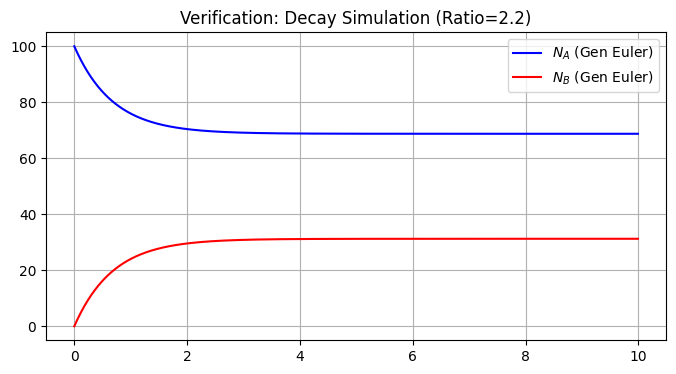

In [8]:
ratio = 2.2
tau_a, tau_b = ratio, 1.0
dt, t_max = 0.01, 10
t = np.arange(0, t_max, dt)

state = [100.0, 0.0] # Initial [Na, Nb]
na_hist, nb_hist = [state[0]], [state[1]]

for _ in range(len(t)-1):
    state = gen_euler(state, dt, decay_derivatives, tau_a=tau_a, tau_b=tau_b)
    na_hist.append(state[0])
    nb_hist.append(state[1])

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, na_hist, label='$N_A$ (Gen Euler)', color='blue')
plt.plot(t, nb_hist, label='$N_B$ (Gen Euler)', color='red')
plt.title(f'Verification: Decay Simulation (Ratio={ratio})')
plt.legend()
plt.grid(True)
plt.show()